### 2D Image Extraction
Here we are iterating through the T1 images and pull out the 120th image.
Build a df of those images, with the attached age of that brain scan

In [78]:
import numpy as np
import nibabel as nib
import glob
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
import tqdm

In [79]:
eg = sorted(glob.glob('./Inputs/IXI-T1/IXI451-HH-2212-T1.nii.gz'))

In [80]:
for e in eg:
    img = nib.load(e)
    img_data = img.get_data()
    img_data = np.asarray(img_data)  

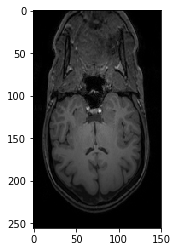

(256, 256, 150)

In [81]:
plt.imshow(img_data[130], cmap='gray')
plt.show()
img_data.shape

In [82]:
slices = []
ID = []
files = sorted(glob.glob('./Inputs/IXI-T1/*.nii.gz'))
for f in tqdm.tqdm(files):
    #fetch each nii file and take only 120th slice
    img = nib.load(f)
    img_data = img.get_data()
    img_data = np.asarray(img_data)  
    img_data.astype(int)             
    img_data = img_data[120, :, :]
    slices.append(list(img_data.flatten()))
    
    #extract id to later append to df
    m = re.search('/[IXI]+(\d\d\d)', str(f))
    ID.append(m.group(1))

100%|██████████| 581/581 [03:42<00:00,  2.62it/s]


In [83]:
slices = pd.DataFrame(slices, dtype=int)

In [84]:
slices['ID'] = ID
slices['ID'] = slices.ID.astype(int)

In [85]:
#adding AGE to slices
AGE = pd.read_csv('./AGE_ID.csv')
AGE = AGE.drop('Unnamed: 0',axis=1)
X = slices.merge(AGE,left_on='ID',right_on='IXI_ID')
X = X.drop(['ID','IXI_ID'],axis=1)

In [86]:
X.shape

(588, 38401)

In [87]:
X = X.dropna()

In [88]:
X.shape

(516, 38401)

In [89]:
X.to_csv('2D_120.csv')